### opt Adam

In [15]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os

batch_size = 128
num_classes = 10
epochs = 10
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_mnist_fcn_trained_model_code.h5'


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same',
                ))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(10, (2, 2), activation='softmax'))
model.add(Flatten())

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
print(model.summary())
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
con

In [9]:
from keras.models import load_model
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
model = load_model('/home/ubuntu/imageclassfy/app/saved_models/keras_mnist_fcn_trained_model_code.h5')

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


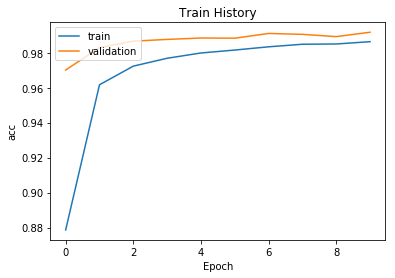

In [12]:
show_train_history(train_history, 'acc','val_acc')

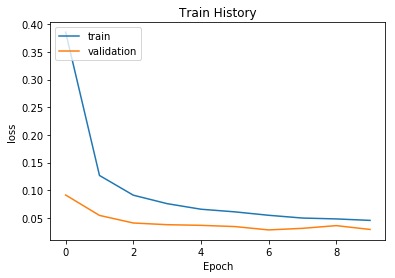

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

In [14]:
prediction = model.predict_classes(x_test.reshape(x_test.shape[0], 28, 28, 1))

In [15]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

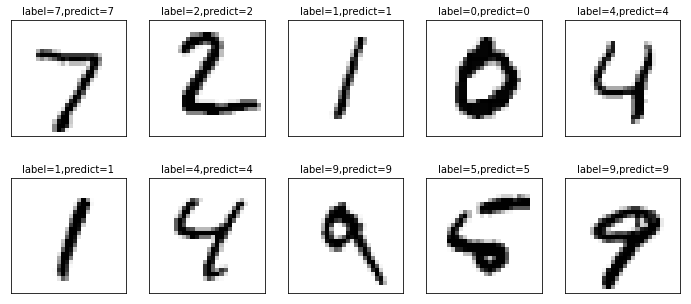

In [17]:
plot_images_labels_prediction(x_test, y_test, prediction, idx=0)

In [18]:
import pandas as pd

pd.crosstab(y_test,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,2,1130,2,0,0,0,1,0,0,0
2,0,1,1030,0,0,0,0,1,0,0
3,0,0,0,1005,0,3,0,0,2,0
4,0,0,0,0,968,0,4,1,0,9
5,1,0,1,5,0,883,2,0,0,0
6,6,3,0,0,1,4,942,0,2,0
7,0,2,8,0,0,0,0,1014,1,3
8,3,0,1,2,1,1,2,1,962,1
